In [ ]:
!pip install python-louvain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 27.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9406 sha256=8870fa0683bc59e8316122b711dbd30ad32f51d909eacc42871f39a729a58ebd
  Stored in directory: /root/.cache/pip/wheels/4d/7c/b6/79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import json
import time
import networkx as nx
from itertools import combinations
from datetime import datetime
from community import community_louvain
import matplotlib.pyplot as plt
from collections import Counter

#build permette di definire il punto di accesso da cui invocare i diversi endpoint delle YouTube API.
from googleapiclient.discovery import build

In [ ]:
with open('videoToCommenters_with_details.json', 'r') as json_file:
    muschio_dict = json.load(json_file)

In [ ]:
muschio_net = nx.read_gexf('muschio_new.gexf')

Abbiamo una rete con 100 nodi e 1885 link quindi una rete molto densa.

## COMMUNITY DETECTION

### Louvain (aggiungo come attributo ai nodi)

Number of communities detected: 4
Community sizes: [26, 38, 15, 21]


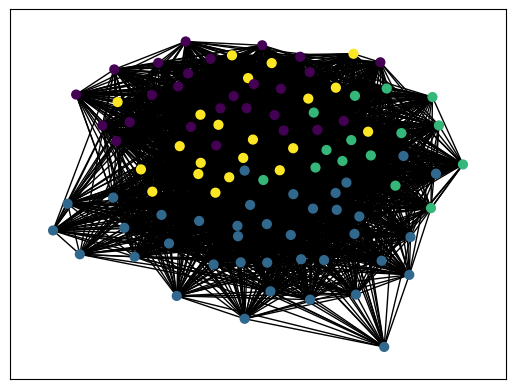

In [ ]:
# Applica l'algoritmo di Louvain per trovare le comunità
partition = community_louvain.best_partition(muschio_net)

# Stampa il numero di comunità trovate
num_communities = len(set(partition.values()))
print(f"Number of communities detected: {num_communities}")

# Aggiungi le informazioni sulla comunità ai nodi del grafo per visualizzazioni future
for node, community in partition.items():
    muschio_net.nodes[node]['community'] = community

# Osserva la distribuzione delle comunità
community_sizes = [list(partition.values()).count(comm) for comm in set(partition.values())]
print(f"Community sizes: {community_sizes}")

# Opzionale: Visualizzazione delle comunità usando NetworkX e Matplotlib
import matplotlib.pyplot as plt

# Assegna un colore a ogni comunità
colors = [partition[node] for node in muschio_net]
pos = nx.spring_layout(muschio_net)  # Usa spring layout per una visualizzazione ottimale
nx.draw_networkx(muschio_net, pos, node_color=colors, node_size=40, with_labels=False)
plt.show()


In [ ]:
nx.write_gexf(muschio_net, 'muschio_net.gexf')

In [ ]:
muschio_net = nx.read_gexf('muschio_net.gexf')

### Diagramma delle community

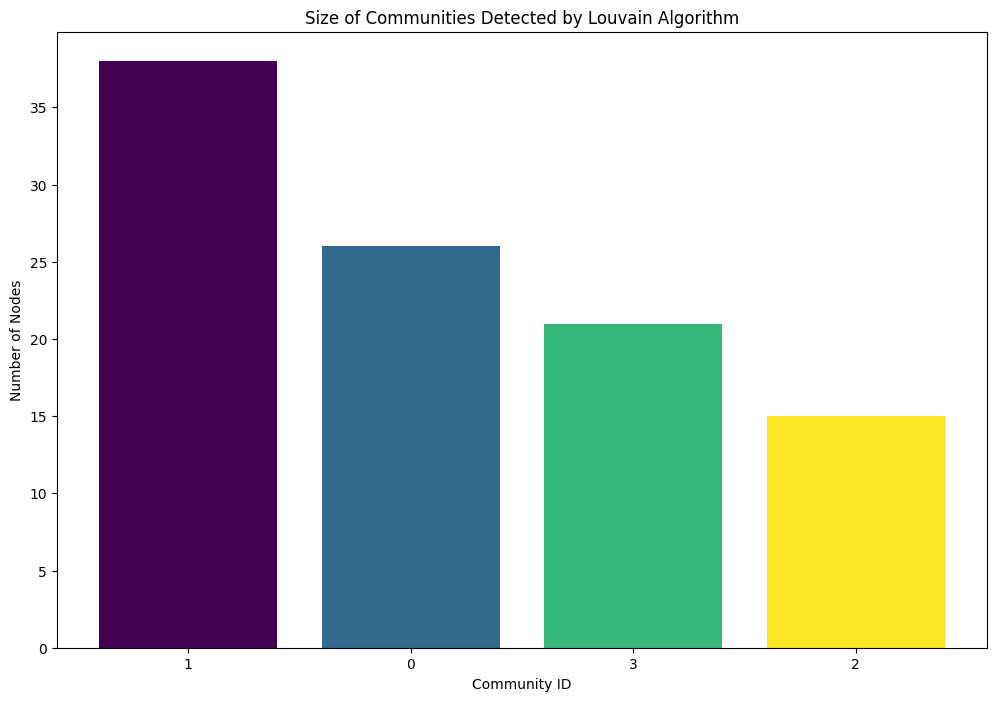

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np  # Importiamo numpy per una facile manipolazione degli array

# Calcola le dimensioni di ogni community con Counter per semplificare il processo
community_sizes = Counter(partition.values())

# Prepara i dati per il plot
communities = list(community_sizes.keys())  # ID delle community
sizes = list(community_sizes.values())  # Dimensioni delle community

# Ordina le community per dimensione (opzionale, per una migliore visualizzazione)
sorted_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)
communities, sizes = zip(*sorted_communities)

# Genera colori diversi per ogni barra
colors = plt.cm.viridis(np.linspace(0, 1, len(communities)))

# Creazione del diagramma a colonne
plt.figure(figsize=(12, 8))
plt.bar(range(len(communities)), sizes, color=colors)
plt.xlabel('Community ID')
plt.ylabel('Number of Nodes')
plt.title('Size of Communities Detected by Louvain Algorithm')
plt.xticks(range(len(communities)), [str(i) for i in communities])  # Etichette x-axis come ID di community
plt.show()
